In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('Dummy_data.csv')
df.head()

,customerid,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
X = df.drop(['customerid','churn_Yes'], axis = 1)
y = df[['churn_Yes']]

In [4]:
y.shape

(7043, 1)

In [5]:
X.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify = y)

In [47]:
y_test

,churn_Yes
2045,0
2681,0
3562,1
3238,0
5357,0
...,...
1825,0
1838,0
1116,0
5947,1


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Balancing the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[('churn_Yes', 1)]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
regressor = LogisticRegression()
regressor.fit(X_resampled, y_resampled)
print(regressor.score(X_test, y_test))
print(regressor.score(X_resampled, y_resampled))

0.750591575958353
0.7674225663716814


C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
score = regressor.score(X_test, y_test)
score

0.750591575958353

In [12]:
prediction_test = regressor.predict(X_test)
prediction_test.shape

(2113,)

In [13]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_test)
print(cm)

[[1139  419]
 [ 108  447]]


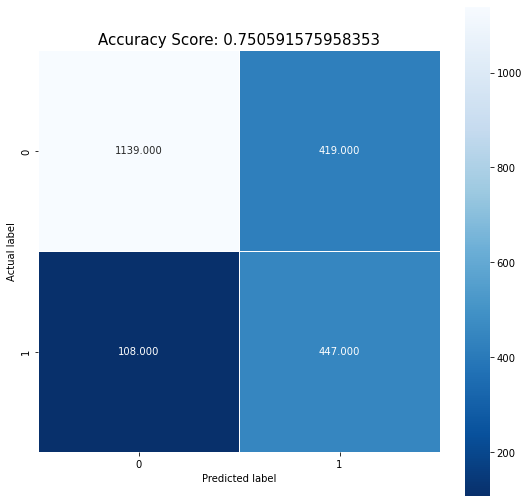

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
'''Recall this is a classification problem with classes 0 and 1. 
Notice that the coefficients are both positive and 
negative. The positive scores indicate a feature that predicts class 1, 
whereas the negative scores indicate a feature that predicts class 0'''

Feature:tenure,
 Score: -1.17639 

Feature:monthlycharges,
 Score: -0.72456 

Feature:totalcharges,
 Score: 0.49171 

Feature:gender_Male,
 Score: -0.01863 

Feature:seniorcitizen_Yes,
 Score: 0.04431 

Feature:partner_Yes,
 Score: 0.00743 

Feature:dependents_Yes,
 Score: -0.11286 

Feature:phoneservice_Yes,
 Score: -0.02917 

Feature:multiplelines_Yes,
 Score: 0.12870 

Feature:onlinesecurity_Yes,
 Score: -0.10768 

Feature:onlinebackup_Yes,
 Score: -0.00446 

Feature:deviceprotection_Yes,
 Score: 0.06318 

Feature:techsupport_Yes,
 Score: -0.04543 

Feature:streamingtv_Yes,
 Score: 0.20608 

Feature:streamingmovies_Yes,
 Score: 0.14815 

Feature:paperlessbilling_Yes,
 Score: 0.15514 

Feature:internetservice_DSL,
 Score: -0.06592 

Feature:internetservice_Fiber optic,
 Score: 0.61282 

Feature:internetservice_No,
 Score: -0.66225 

Feature:contract_Month-to-month,
 Score: 0.30028 

Feature:contract_One year,
 Score: -0.01189 

Feature:contract_Two year,
 Score: -0.33853 

Feature:pa

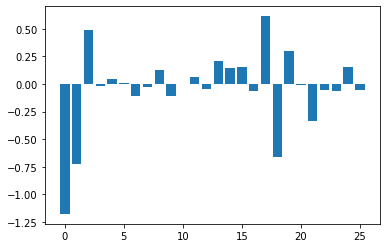

In [39]:
# get importance
importance = regressor.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    name = X.columns[i]
    print(f'Feature:{name},\n Score: %.5f \n' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = regressor.predict(X_test)
confusion_matrix(y_pred=y_pred, y_true=y_test)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

NameError: name 'metrics' is not defined

In [ ]:
print(regressor.score(X_resampled, y_resampled))
print(regressor.score(X_test, y_test))
print(classification_report(y_test,y_pred))